---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Actors collaborations constellations and Oscars analysis

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from itertools import combinations
import networkx as nx
from collections import Counter
from pyvis.network import Network
from scipy.stats import linregress,  f_oneway
from networkx.algorithms import community

from helpers_actors_analysis import *

In [2]:
ABS_PATH = "/Users/mehdibouchoucha/Desktop/ADA/ada-2024-project-theundocumentedanalysts/data"

# First Study :

This first study is to find the relation between actor pairs, we first clean the data and keep the important column that are relevant to the subject. The two initial databases, namely "character_metadata" and "movie_metadata".

### Steps :
- We removed the irrelevant columns and merged on the 

In [3]:
character_metadata = pd.read_csv(ABS_PATH+'/CMU_dataset/character.metadata.tsv', sep='\t')
movie_metadata = pd.read_csv(ABS_PATH+'/CMU_dataset/movie.metadata.tsv', sep='\t')
oscar_data =pd.read_csv(ABS_PATH+'/the_oscar_award.csv')
movie_data = pd.read_csv(ABS_PATH+'/movie_data.csv')

In [4]:
movie_metadata.columns =['Wikipedia movie ID','Freebase movie ID','Movie name','Movie release date',
                        'Movie box office revenue','Movie runtime','Movie languages',
                        'Movie countries','Movie genres']
print(movie_metadata.columns)

Index(['Wikipedia movie ID', 'Freebase movie ID', 'Movie name',
       'Movie release date', 'Movie box office revenue', 'Movie runtime',
       'Movie languages', 'Movie countries', 'Movie genres'],
      dtype='object')


In [5]:
# Add headers
character_metadata.columns = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID'
]

movie_metadata['Movie genres'] = movie_metadata['Movie genres'].apply(extract_genres)
print(movie_metadata[['Movie genres']].head())

                                        Movie genres
0        Mystery|Biographical film|Drama|Crime Drama
1                                Crime Fiction|Drama
2    Thriller|Erotic thriller|Psychological thriller
3                                              Drama
4  Short Film|Silent film|Indie|Black-and-white|C...


In [6]:
print(character_metadata.shape)
print(movie_metadata.shape)

merged_movie_character = pd.merge(character_metadata, movie_metadata, 
                                  left_on='Wikipedia movie ID', 
                                  right_on='Wikipedia movie ID', 
                                  how='inner')
merged_movie_character.shape

#We only lost 16 rows from the merge

(450668, 13)
(81740, 9)


(450652, 21)

In [7]:
merged_movie_character.drop(columns=['Movie languages','Movie countries',
                                    'Freebase character/actor map ID','Freebase character ID','Freebase actor ID',
                                    'Freebase movie ID_y','Freebase movie ID_x'])
merged_movie_character.head(1)

,Wikipedia movie ID,Freebase movie ID_x,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,...,Freebase character ID,Freebase actor ID,Freebase movie ID_y,Movie name,Movie release date_y,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,3196793,/m/08yl5d,2000-02-16,Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,...,/m/0lr3z80,/m/0h8pnlw,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Mystery|Biographical film|Drama|Crime Drama


In [8]:
visualize_top_actor_genre(merged_movie_character)

actor_collaboration_filtered_genre_optimized.html


# Conclusion on this study :

We have shown that it is possible to find the relations between actor pairs based on genre, we can and will finetune this study to apply it to top grossing movies and best actors based on oscars in future milestones.

## Additional findings :

In order to better observe this graph in a more interactive way, we can use the cosmograph application which takes up to 1 million nodes and can gives us better indication since it will target a bigger sample, this proposition is still in progress and we are researching how we could implement it.

# Possible behavior in additional datasets :

### For Movie DATA :
To analyze the relationship between movie characteristics and success metrics, we start by merging the movie metadata and character metadata using the Wikipedia Movie ID as the key, keeping only relevant columns. Then, we merge this dataset with additional movie data using movie names as the key, ensuring to verify how many rows are dropped during this process to confirm coherence and avoid losing too many movies. Retain key columns such as IMDb scores, movie names, and other relevant attributes for further analysis. Investigate the correlation between IMDb scores and gross revenue to explore their relationship. Group movies by country and calculate the mean IMDb score for each, while considering the number of movies produced per country to ensure robust results. Additionally, analyze the impact of actor age by examining whether movies with older, more experienced actors tend to have higher IMDb scores or if movies featuring younger actors (e.g., in their 20s) are more popular, possibly reflected in revenue or IMDb scores.
### For oscars data :
Test the hypothesis that younger actors make better or more popular movies by merging with the Oscar dataset and creating visualizations of actor age versus IMDb scores, gross revenue, and Oscar wins.

In [9]:
movie_data.drop(columns=['index','num_voted_users','movie_imdb_link','title_year'])
movie_data.head()

,index,director_name,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,movie_imdb_link,num_user_for_reviews,language,country,title_year,imdb_score
0,0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,2009.0,7.9
1,1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,2007.0,7.1
2,2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,2015.0,6.8
3,3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,2012.0,8.5
4,4,Doug Walker,NaN,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


In [10]:
#check rows before and after merging
print(movie_data.shape)
print(merged_movie_character.shape)

(5043, 15)
(450652, 21)


In [11]:
score_movie_character = pd.merge(movie_data,merged_movie_character, left_on ='movie_title',right_on ='Movie name'
                                ,how = 'inner')
score_movie_character

,index,director_name,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,movie_imdb_link,...,Freebase character ID,Freebase actor ID,Freebase movie ID_y,Movie name,Movie release date_y,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres


# Not usable for movie_data_csv

Can't Merge on the basis of movie name 

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Oscars data Study

In [12]:
oscar_movie_character = pd.merge(oscar_data,merged_movie_character, left_on ='film',right_on ='Movie name')

In [13]:
#only keep actors and actresses
filtered_oscar_data = oscar_movie_character[oscar_movie_character['category'].str.contains('ACTRESS|ACTOR', case=False, na=False)]
print(filtered_oscar_data.shape)

(24686, 28)


In [14]:
filtered_oscar_data.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner', 'Wikipedia movie ID', 'Freebase movie ID_x',
       'Movie release date_x', 'Character name', 'Actor date of birth',
       'Actor gender', 'Actor height (in meters)',
       'Actor ethnicity (Freebase ID)', 'Actor name',
       'Actor age at movie release', 'Freebase character/actor map ID',
       'Freebase character ID', 'Freebase actor ID', 'Freebase movie ID_y',
       'Movie name', 'Movie release date_y', 'Movie box office revenue',
       'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'],
      dtype='object')

In [15]:
filtered_matching_oscar_data = filtered_oscar_data[filtered_oscar_data['name'] == filtered_oscar_data['Actor name']]
filtered_matching_oscar_data.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner', 'Wikipedia movie ID', 'Freebase movie ID_x',
       'Movie release date_x', 'Character name', 'Actor date of birth',
       'Actor gender', 'Actor height (in meters)',
       'Actor ethnicity (Freebase ID)', 'Actor name',
       'Actor age at movie release', 'Freebase character/actor map ID',
       'Freebase character ID', 'Freebase actor ID', 'Freebase movie ID_y',
       'Movie name', 'Movie release date_y', 'Movie box office revenue',
       'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'],
      dtype='object')

# Gender analysis in actor winners

Small study to observe an additional variable in average box office revenue


In [16]:
# Count representation of genders in Oscar-winning roles
gender_representation = filtered_matching_oscar_data.groupby(['Actor gender', 'winner']).size().unstack()
print(gender_representation)

winner        False  True 
Actor gender              
F               584    156
M               599    158


In [17]:
# Compare average box office revenue between winning actors and actresses
winning_actors = filtered_matching_oscar_data[(filtered_matching_oscar_data['category'].str.contains('ACTOR')) & (filtered_matching_oscar_data['winner'] == True)]
winning_actresses = filtered_matching_oscar_data[(filtered_matching_oscar_data['category'].str.contains('ACTRESS')) & (filtered_matching_oscar_data['winner'] == True)]

avg_revenue_actors = winning_actors['Movie box office revenue'].mean()
avg_revenue_actresses = winning_actresses['Movie box office revenue'].mean()

print(f"Average Box Office Revenue (Actors): {avg_revenue_actors}")
print(f"Average Box Office Revenue (Actresses): {avg_revenue_actresses}")

Average Box Office Revenue (Actors): 91138551.9736842
Average Box Office Revenue (Actresses): 86507486.60185185


# Trend over time 

Small study to see if age and experience are a variable in winning oscars


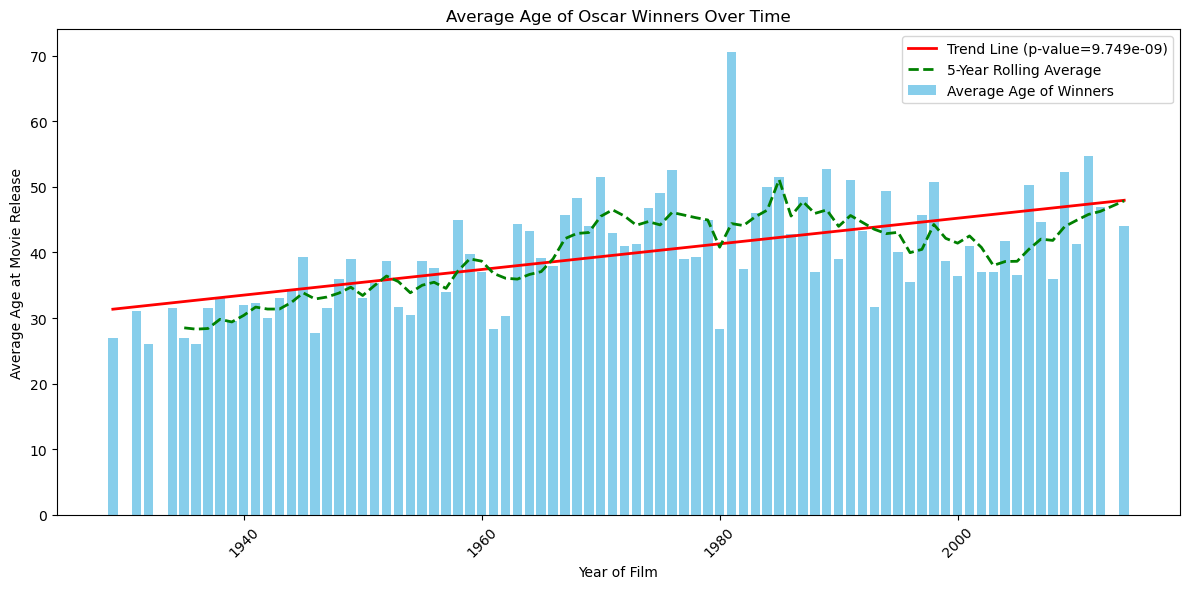

ANOVA F-statistic: 4.233, p-value: 3.956e-05


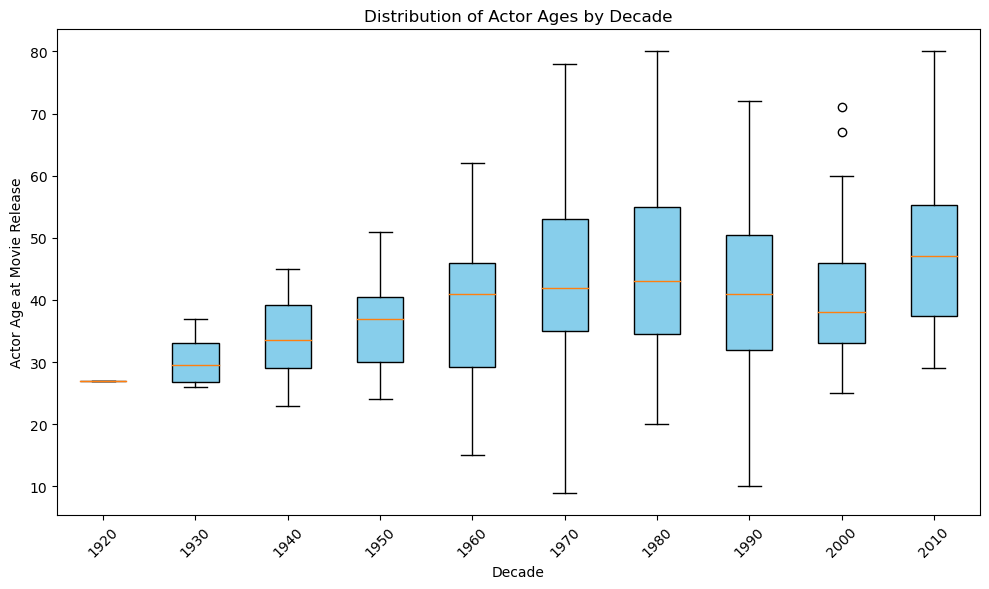

In [18]:
# Filter winning data to only include oscar nwinners 
winning_data = filtered_matching_oscar_data[filtered_matching_oscar_data['winner'] == True]
winning_data = winning_data.dropna(subset=['Actor age at movie release'])

# Calculate the average age over the years
avg_age_over_years = winning_data.groupby('year_film')['Actor age at movie release'].mean()
avg_age_over_years = avg_age_over_years.dropna()

# Perform linear regression to understand the trend
years = avg_age_over_years.index.values
avg_ages = avg_age_over_years.values

# Check if there are enough data points and if there's variation in the data
if len(years) > 1 and np.std(avg_ages) > 0:
    slope, intercept, r_value, p_value, std_err = linregress(years, avg_ages)

    # Generate the trend line
    trend_line = slope * years + intercept
    
    # Bar chart  
    plt.figure(figsize=(12, 6))
    plt.bar(years, avg_ages, color='skyblue', label='Average Age of Winners')

    # Plot the linear regression trend line
    plt.plot(years, trend_line, color='red', linewidth=2, label=f'Trend Line (p-value={p_value:.3e})')

    # Plot the rolling average
    rolling_avg = avg_age_over_years.rolling(window=5).mean()
    plt.plot(years, rolling_avg, color='green', linestyle='--', linewidth=2, label='5-Year Rolling Average')

    plt.xlabel('Year of Film')
    plt.ylabel('Average Age at Movie Release')
    plt.title('Average Age of Oscar Winners Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    
    plt.show()
else:
    print("Not enough data points or no variation in the average ages to perform linear regression.")

# Adding decade column
winning_data['decade'] = (winning_data['year_film'] // 10) * 10

# Group by decade and collect ages for ANOVA
decade_groups = winning_data.groupby('decade')['Actor age at movie release'].apply(list)

# Drop empty groups
decade_groups = decade_groups[decade_groups.apply(len) > 0]

# Perform ANOVA
if len(decade_groups) > 1:
    f_stat, p_value_anova = f_oneway(*decade_groups)

    # Print ANOVA results
    print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value_anova:.3e}")

    # Plotting boxplot for ages by decade
    plt.figure(figsize=(10, 6))
    decades = list(decade_groups.index)
    data = list(decade_groups.values)
    plt.boxplot(data, labels=decades, patch_artist=True, boxprops=dict(facecolor='skyblue'))

    # Customize boxplot
    plt.xlabel('Decade')
    plt.ylabel('Actor Age at Movie Release')
    plt.title('Distribution of Actor Ages by Decade')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the boxplot
    plt.show()
else:
    print("Not enough groups to perform ANOVA.")


# Analysis of Average Age of Oscar Winners Over Time

In this analysis, we aimed to study the trends in the average age of Oscar winners over time and to examine the variation of actor ages by decade. The data used includes information about Oscar winners, specifically focusing on their age at the time of the movie's release.

1. Average Age Over the Years with Linear Regression and Rolling Average

We calculated the average age of Oscar winners for each year and visualized it using a bar plot.

A linear regression trend line was added to identify the overall trend in the average age of winners. The red line in the plot represents this trend, with a p-value of 9.749e-09 indicating that the increase in the average age is statistically significant.

A 5-year rolling average was also plotted (in green) to smooth out short-term fluctuations and visualize long-term trends.

From the plot, it is evident that there has been a gradual increase in the average age of Oscar winners over time, suggesting a shift towards older actors winning Oscars in recent years.

2. Analysis of Variation by Decade Using ANOVA

We grouped the data by decade to examine how the age distribution of Oscar winners has changed over time. This grouping helps identify any differences between different time periods.

An ANOVA (Analysis of Variance) test was performed to determine if there were significant differences in the average ages across different decades. The ANOVA results (F-statistic: 4.233, p-value: 3.956e-05) indicate that there are statistically significant differences between decades, suggesting that the average age of winners has not remained constant over time.

The boxplot visualization shows the distribution of actor ages for each decade, including the median, interquartile range, and outliers. The increase in the median age and the range of ages over time suggests that there has been a general broadening of age diversity among Oscar winners.

Summary:

Trend Analysis: The average age of Oscar winners has gradually increased, as indicated by the linear regression trend line and the p-value.

Decadal Analysis: There is a statistically significant difference in the age distribution of winners between different decades, with a trend towards older winners in more recent years.

These findings suggest a shift in the preferences or opportunities for older actors in the film industry, potentially influenced by changes in audience preferences, industry dynamics, or the types of roles available to older actors.



# Box office revenue for winning vs non winning oscar movies

In [19]:
# Compare average box office revenue for winning vs. non-winning movies
avg_box_office_winner = filtered_matching_oscar_data[filtered_matching_oscar_data['winner'] == True]['Movie box office revenue'].mean()
avg_box_office_non_winner = filtered_matching_oscar_data[filtered_matching_oscar_data['winner'] == False]['Movie box office revenue'].mean()

print(f"Average Box Office Revenue (Winners): {avg_box_office_winner}")
print(f"Average Box Office Revenue (Non-Winners): {avg_box_office_non_winner}")

Average Box Office Revenue (Winners): 88885601.25225225
Average Box Office Revenue (Non-Winners): 74654348.64332037


# Movie Genre

This is a more general study on movie genre without filtering as in the first study

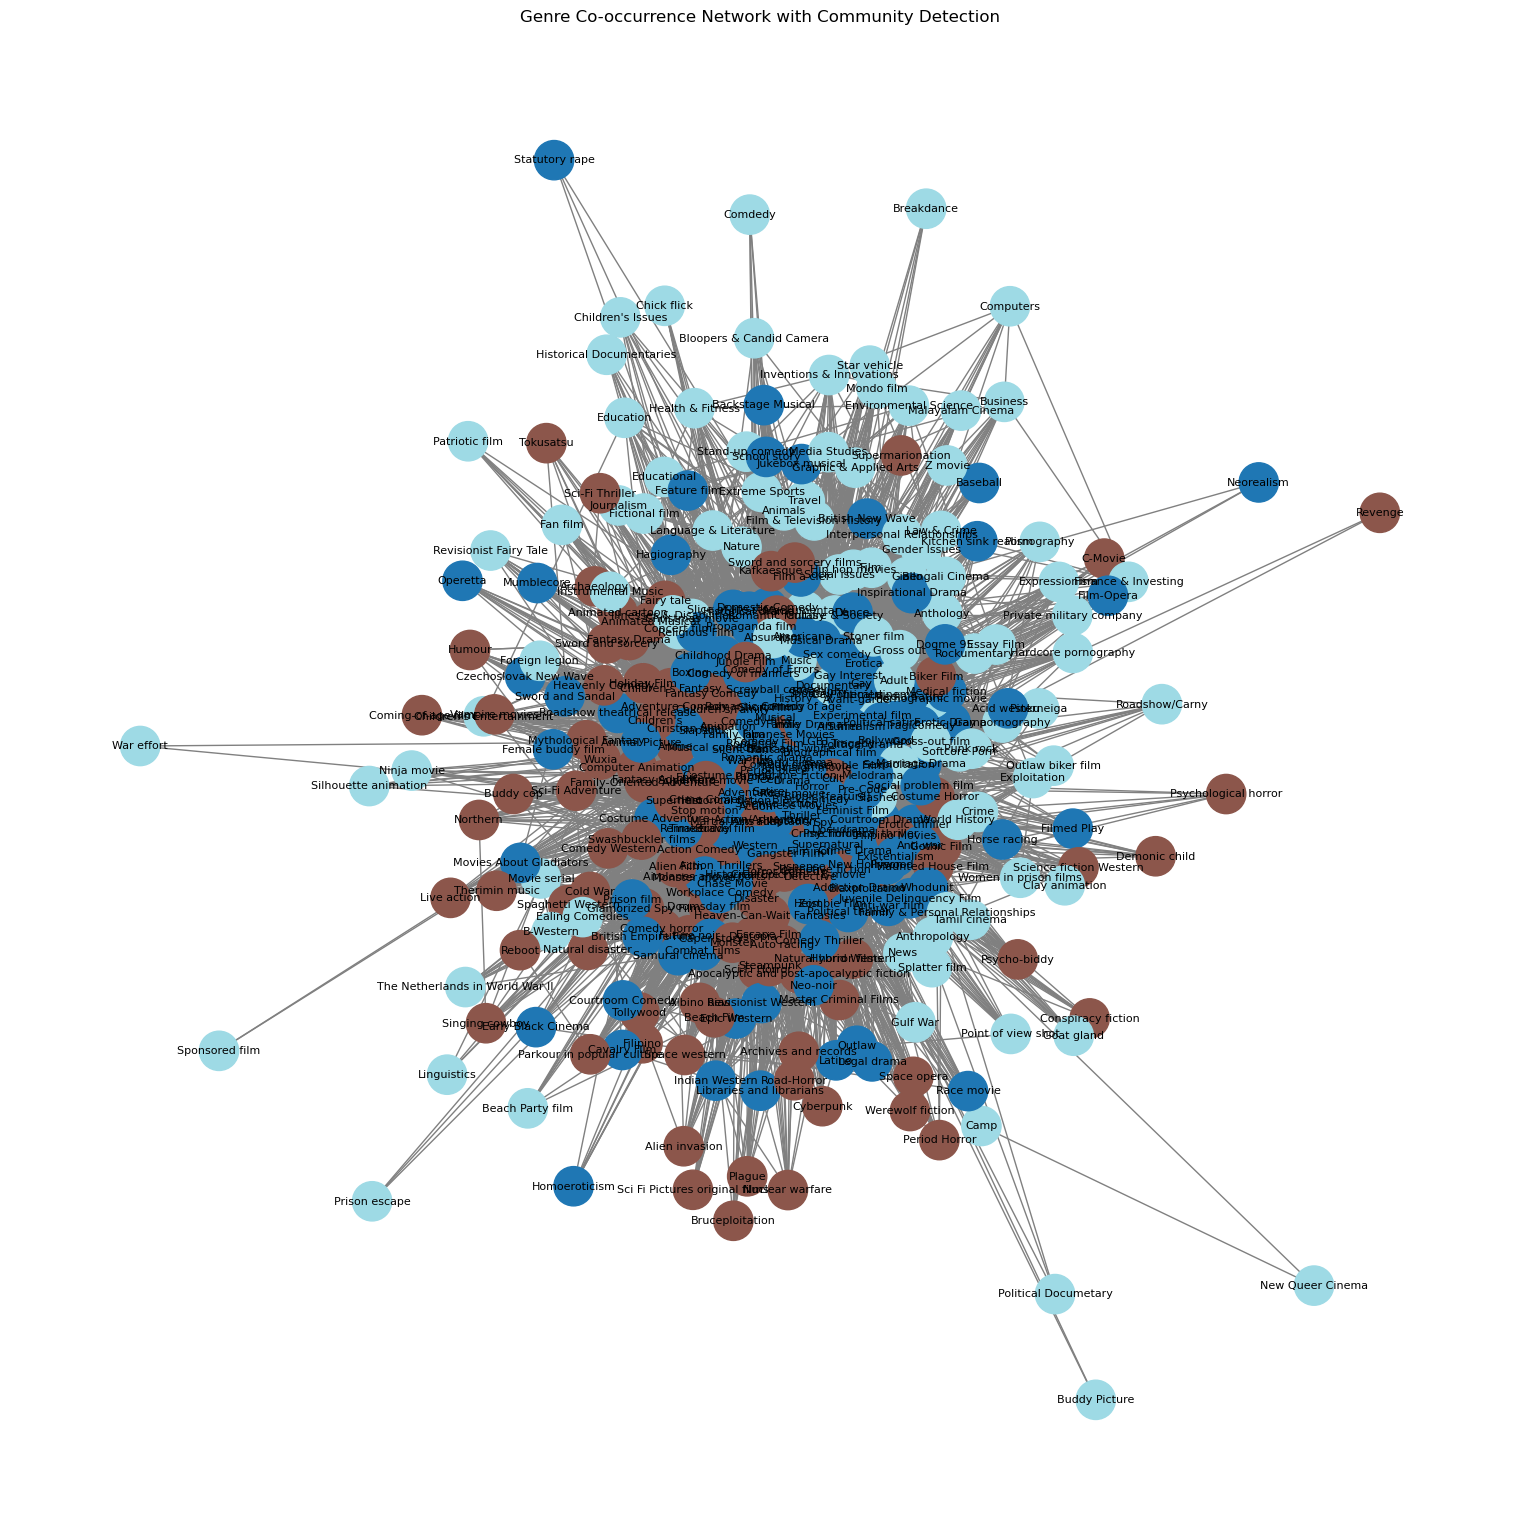

In [20]:
# Create pairs of genres for each movie to build a co-occurrence network
genre_pairs = []

# Iterate over each row in the cleaned 'Movie genres' column
for genres in movie_metadata['Movie genres'].dropna().str.split('|'):
    for i in range(len(genres)):
        for j in range(i + 1, len(genres)):
            genre_pairs.append((genres[i].strip(), genres[j].strip()))

# Create a NetworkX graph
G = nx.Graph()
G.add_edges_from(genre_pairs)

# Detect communities using the greedy modularity method
communities = list(community.greedy_modularity_communities(G))

# Assign colors to nodes based on their community
color_map = {}
for idx, comm in enumerate(communities):
    for node in comm:
        color_map[node] = idx

# Extract the color for each node from the color_map
node_colors = [color_map[node] for node in G.nodes()]

# Use a spring layout for better visualization
pos = nx.spring_layout(G, k=0.5)

# Draw the graph with nodes colored by their community
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_size=800, node_color=node_colors, cmap=plt.cm.tab20, edge_color='gray', font_size=8)
plt.title('Genre Co-occurrence Network with Community Detection')
plt.show()


In [21]:
# Calculate genre frequencies
all_genres = movie_metadata['Movie genres'].dropna().str.split('|').sum()
genre_counts = pd.Series(all_genres).value_counts()

# Define threshold for filtering
min_threshold = 10  
max_threshold = 500  

# Filter genres based on their occurrence count
filtered_genres = genre_counts[(genre_counts > min_threshold) & (genre_counts < max_threshold)].index

# Create filtered genre pairs for graph
filtered_genre_pairs = [pair for pair in genre_pairs if pair[0] in filtered_genres and pair[1] in filtered_genres]

# Create the graph
G_filtered = nx.Graph()
G_filtered.add_edges_from(filtered_genre_pairs)

In [22]:
pair_counts = Counter(genre_pairs)

top_pairs = [pair for pair, count in pair_counts.most_common(50)]  # Adjust as needed

# Create the graph with only top pairs
G_top_pairs = nx.Graph()
G_top_pairs.add_edges_from(top_pairs)


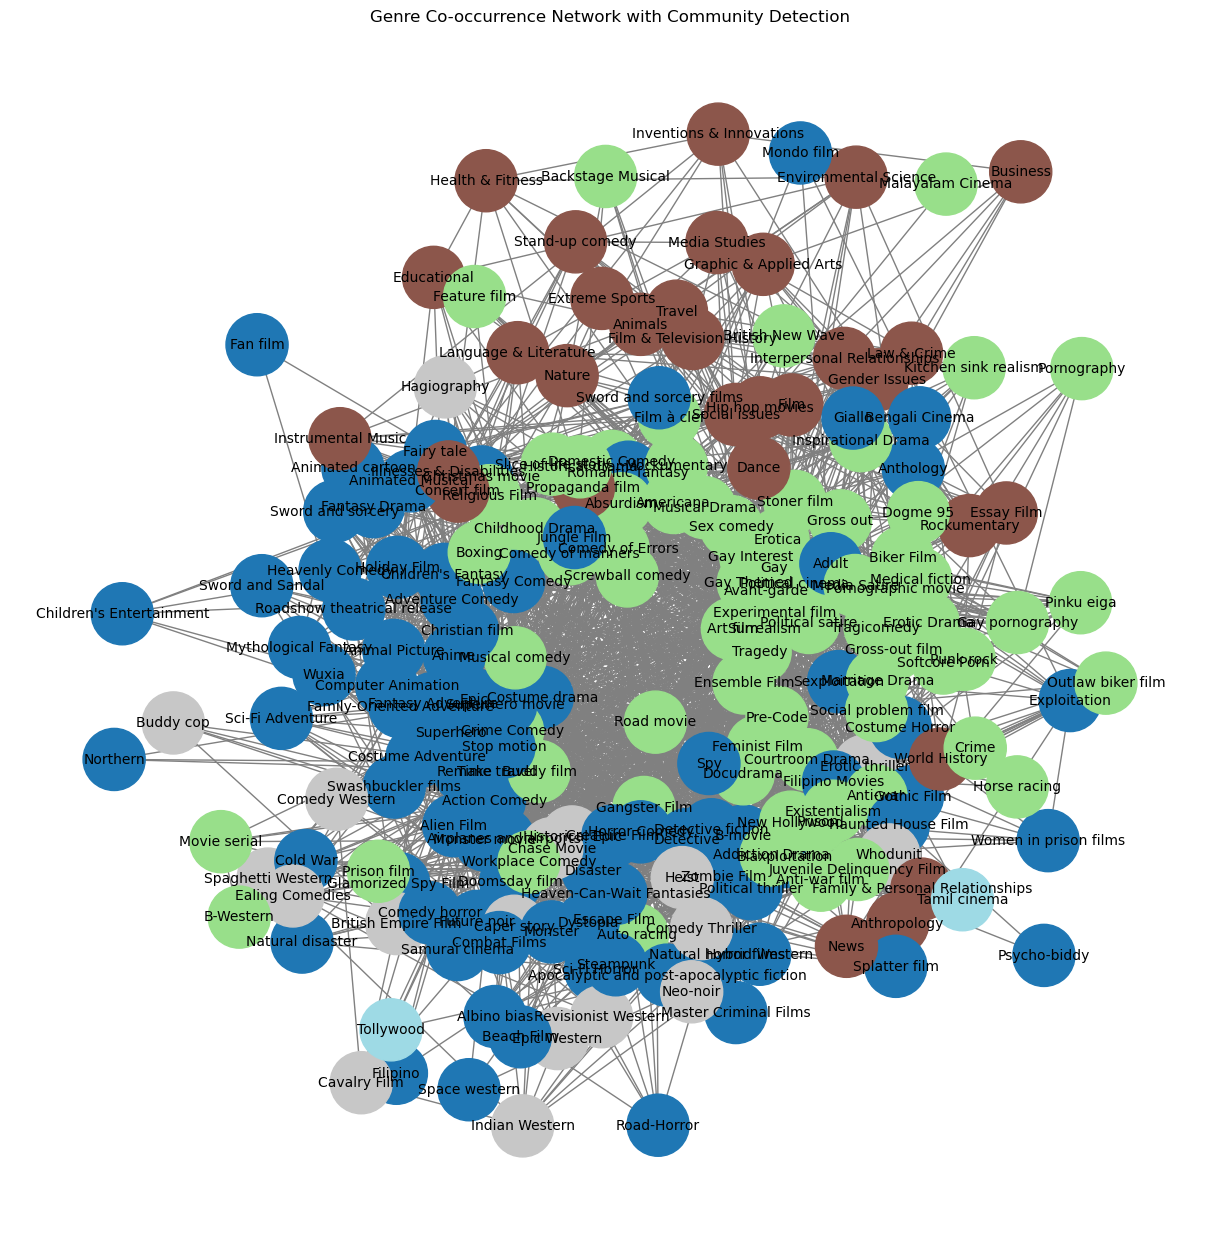

In [23]:
# Detect communities using the greedy modularity method
communities = community.greedy_modularity_communities(G_filtered)

# Assign colors based on the community each node belongs to
color_map = []
for node in G_filtered:
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)

# Draw the graph with colored nodes
plt.figure(figsize=(12, 12))
nx.draw(G_filtered, pos, with_labels=True, node_size=2000, node_color=color_map, cmap=plt.cm.tab20, edge_color='gray', font_size=10)
plt.title('Genre Co-occurrence Network with Community Detection')
plt.show()

### We observe that it is difficult to have a valid interpretation due to the high number of movies, in order to add a more conclusive study, we can filter with the top 500 highest grossing movies and filter them by genre and have an interactive plot for better visualization

In [24]:
# There are a lot of NaN in 'Movie box office revenue' so we filter them and rename to gross.
movie_metadata = movie_metadata.rename(columns={'Movie box office revenue': 'Gross'})
filtered_movies = movie_metadata.dropna(subset=['Gross'])

# Filter by top 500 grossing movies and calculate genre frequencies
top_500_movies = filtered_movies.nlargest(500, 'Gross')
all_genres = top_500_movies['Movie genres'].dropna().str.split('|').sum()
genre_counts = pd.Series(all_genres).value_counts()

# Define threshold for filtering
min_threshold = 10  
max_threshold = 500  

# Filter genres based on their occurrence count
filtered_genres = genre_counts[(genre_counts > min_threshold) & (genre_counts < max_threshold)].index

# Generate genre pairs
genre_pairs = []
for _, row in top_500_movies.iterrows():
    genres = row['Movie genres']
    if pd.isna(genres):
        continue
    genres_list = genres.split('|')
    genre_pairs.extend(list(combinations(genres_list, 2)))

# Filter genre pairs
filtered_genre_pairs = [pair for pair in genre_pairs if pair[0] in filtered_genres and pair[1] in filtered_genres]

# Count the occurrences of genre pairs
pair_counts = Counter(filtered_genre_pairs)

# Get the Top 50 Pairs
top_pairs = [pair for pair, count in pair_counts.most_common(50)]

# Initialize Pyvis Network
net = Network(notebook=True, height='1000px', width='100%', bgcolor='#222222', font_color='white')

# Assign unique colors to each genre
genre_colors = {genre: f'#{random.randint(0, 0xFFFFFF):06x}' for genre in filtered_genres}

# Add nodes with tooltips and increased size to reduce overlap
for genre in filtered_genres:
    size = int(genre_counts[genre] * 3)  
    color = genre_colors[genre]
    net.add_node(genre, label='', title=genre, size=size, color=color)  

# Add edges for the top genre pairs
for genre1, genre2 in top_pairs:
    net.add_edge(genre1, genre2)

net.toggle_physics(True)

# Settings for bringing outer nodes closer and pushing nodes with many connections further
net.repulsion(
    node_distance=1000,  
    central_gravity=0.05,  
    spring_length=1500,  
    spring_strength=0.2  
)

net.barnes_hut(
    gravity=-30000,  
    central_gravity=0.3,  
    spring_length=100,  
    spring_strength=0.01 
)

# Interactive Visualization
net.show("top_genre_collaboration_filtered_adjusted.html")

top_genre_collaboration_filtered_adjusted.html


# We can even further refine this study by studying the actors that play in these top grossing movies and see if there are any redunduncies

In [25]:
# Apply the function to get the top 500 grossing movies
top_500_grossing_movies = filter_top_grossing_movies(merged_movie_character, top_n=500)

# Get the genres for these top movies and proceed with further analysis or visualization if needed
all_genres = top_500_grossing_movies['Movie genres'].dropna().str.split('|').sum()
genre_counts = Counter(all_genres)
top_50_genres = [genre for genre, count in genre_counts.most_common(50)]

# Filter the top 500 movies by top 50 genres if needed
filtered_top_movies = top_500_grossing_movies[top_500_grossing_movies['Movie genres'].apply(
    lambda genres: any(g in top_50_genres for g in genres.split('|')))]

In [26]:
# Visualize the top actor pairs in a separate html file
visualize_top_actor_pairs(filtered_top_movies, top_50_genres, top_n_pairs=5000)

top_actor_pairs_visualization.html


/Users/mehdibouchoucha/Desktop/ADA/ada-2024-project-theundocumentedanalysts/src/scripts/helpers_actors_analysis.py:250: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=genre_df.sort_values(by='Count', ascending=False).head(20), palette='viridis')


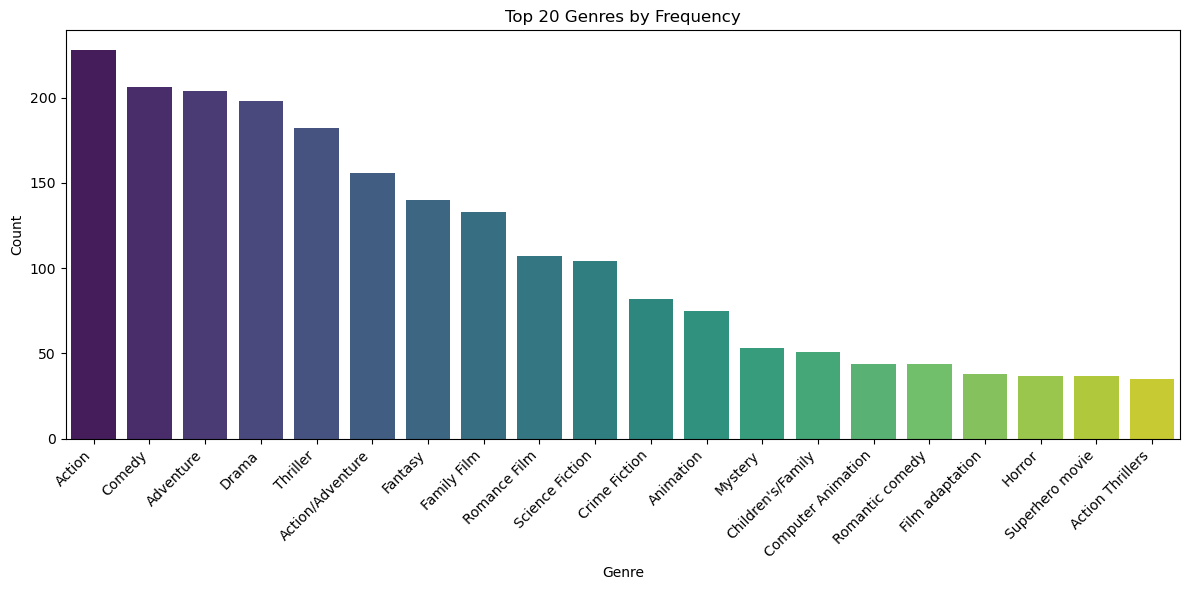

ANOVA F-statistic: 93.372, p-value: 4.329e-74


In [27]:
perform_genre_statistical_analysis(top_500_grossing_movies)

# Analysis :
From the ANOVA results, we see an F-statistic of 93.372 with a p-value of 
4.3294e-74. This extremely low p-value indicates that there is a significant difference in the popularity of different genres.

In other words, the occurrence of genres is not uniform, and some genres are significantly more common in the dataset compared to others. This result suggests that preferences for certain movie genres are much higher than others.

With the top genres plotted, we can see that "Action", "Comedy", "Adventure", and "Drama" dominate the dataset, which aligns with the statistical significance indicated by the ANOVA test

# Final Study :

To analyze genre preferences by actor pairings, we can examine the most common genres in which specific actor pairs have collaborated. This will allow us to identify patterns such as:

- Genre Consistency for Actor Pairs: Do certain actors tend to work together in specific genres?
- Top Genres for Frequent Actor Collaborations: What are the most common genres in which frequently paired actors collaborate?
- Diversity of Genre Participation: Do some actor pairs work across a diverse range of genres, while others specialize?

In [28]:
# Run to get actor_pair_genres
actor_pair_genres = analyze_genre_preferences_by_actor_pairings(filtered_top_movies, top_n_pairs=500)

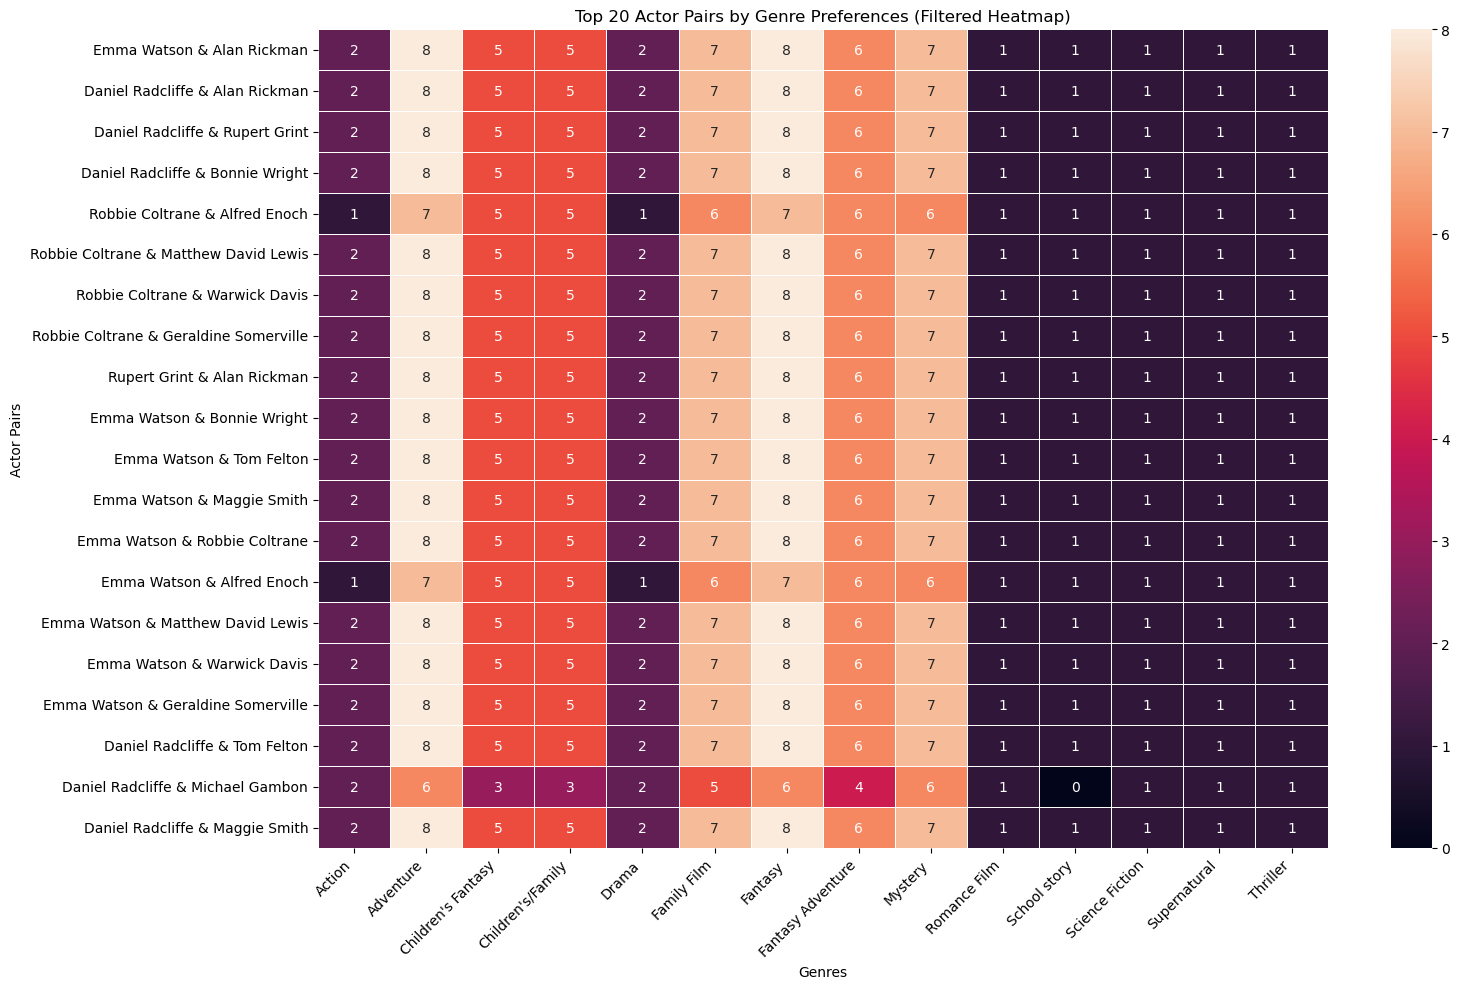

In [29]:
# Run the heatmap visualization
visualize_genre_preferences_heatmap_extended(actor_pair_genres, top_n_pairs=20)

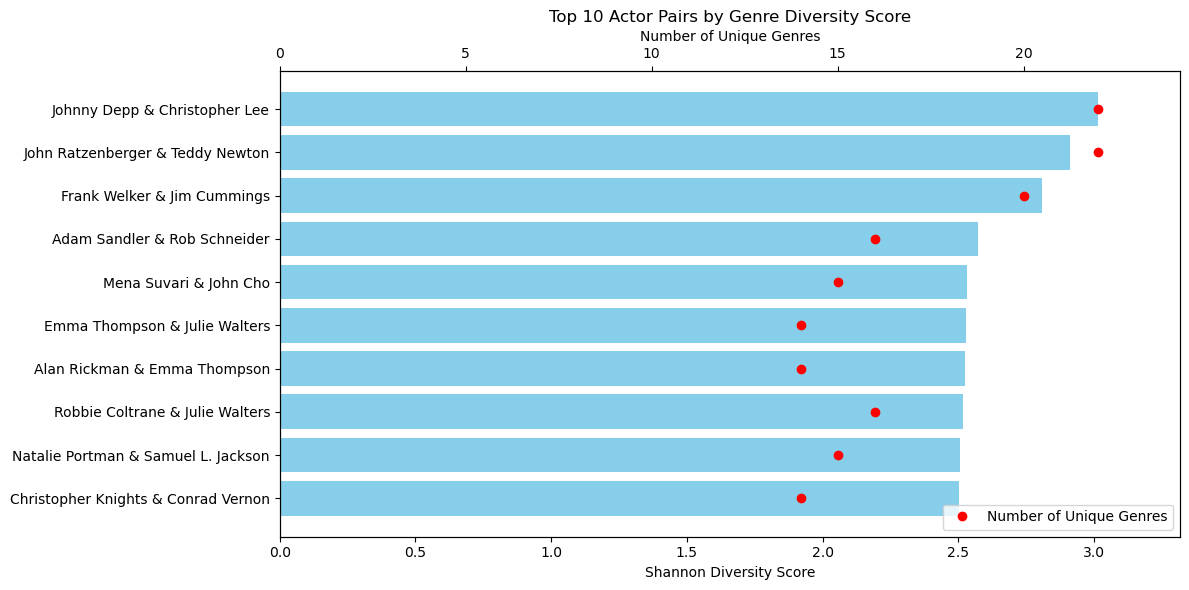

In [30]:
# Calculate diversity scores for the actor pairs
diversity_scores_df = calculate_genre_diversity(actor_pair_genres)

# Extract the top 10 actor pairs by diversity score
top_10_diversity_scores_df = diversity_scores_df.head(10)

# Plotting the Diversity Scores and Unique Genre Count for the Top 10 Actor Pairs
plt.figure(figsize=(12, 6))

# Plot Shannon Diversity Score as bars
ax1 = plt.gca()
ax1.barh(top_10_diversity_scores_df['Actor Pair'], top_10_diversity_scores_df['Shannon Diversity Score'], color='skyblue')
ax1.set_xlabel('Shannon Diversity Score')
ax1.set_title('Top 10 Actor Pairs by Genre Diversity Score')
ax1.invert_yaxis()  # Invert y-axis to have the highest score at the top
ax1.set_xlim([0, max(top_10_diversity_scores_df['Shannon Diversity Score']) * 1.1])

# Create a secondary axis for the unique genre count
ax2 = ax1.twiny()
ax2.plot(top_10_diversity_scores_df['Unique Genres'], top_10_diversity_scores_df['Actor Pair'], 'ro', label='Number of Unique Genres')
ax2.set_xlabel('Number of Unique Genres')
ax2.set_xlim([0, max(top_10_diversity_scores_df['Unique Genres']) * 1.1])
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()


# Analysis of Top 10 Actor Pairs by Genre Diversity Score
- High Shannon Diversity Score paired with a high number of unique genres indicates actor pairs who are versatile and work across a wide range of genres. Examples include Johnny Depp & Christopher Lee.

- Actor pairs with high diversity scores but fewer unique genres (e.g., Frank Welker & Jim Cummings) show balanced collaboration within a more limited genre set, suggesting they are well-distributed but focused.

- Actor pairs with moderate diversity and genre count (e.g., Christopher Knights & Conrad Vernon) suggest specialization within certain genres while maintaining some variety.

- Comparisons between actor pairs with similar diversity scores but differing genre counts (e.g., Emma Thompson & Julie Walters vs. Alan Rickman & Emma Thompson) highlight differences in genre concentration, indicating that some pairs are more genre-focused while others explore slightly broader areas.

Overall, these patterns show that actor pairs can be categorized as either true generalists (broad genre count and high diversity) or niche specialists (balanced presence within fewer genres), reflecting different collaboration styles and career focuses.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Sentiment analysis on actor roles and sympathetic villain preliminary analysis

In [1]:
from helpers_villain_analysis import *

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mehdibouchoucha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mehdibouchoucha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mehdibouchoucha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Setting the File Path
We define the path to the CSV file that contains data on actors' sentiment and popularity scores.
This file is used as input to load and analyze data.


In [5]:
PATH='../../output_data/actor_sentiment_popularity_scores.csv'

### Defining the Plotting Function
The function `plot_sentiment_and_popularity` takes a dataframe and an optional parameter to filter out actors with zero sentiment. It creates a scatter plot of sentiment versus popularity scores, with an interactive cursor.

#### Parameters:
- `df`: Dataframe containing the actor data with sentiment and popularity scores.
- `remove_zero_sentiment`: Boolean flag to filter out actors with zero sentiment scores.


### Loading the Data and Plotting
We load the CSV data into a dataframe, then call `plot_sentiment_and_popularity` to visualize the relationship between actors' sentiment and popularity scores.


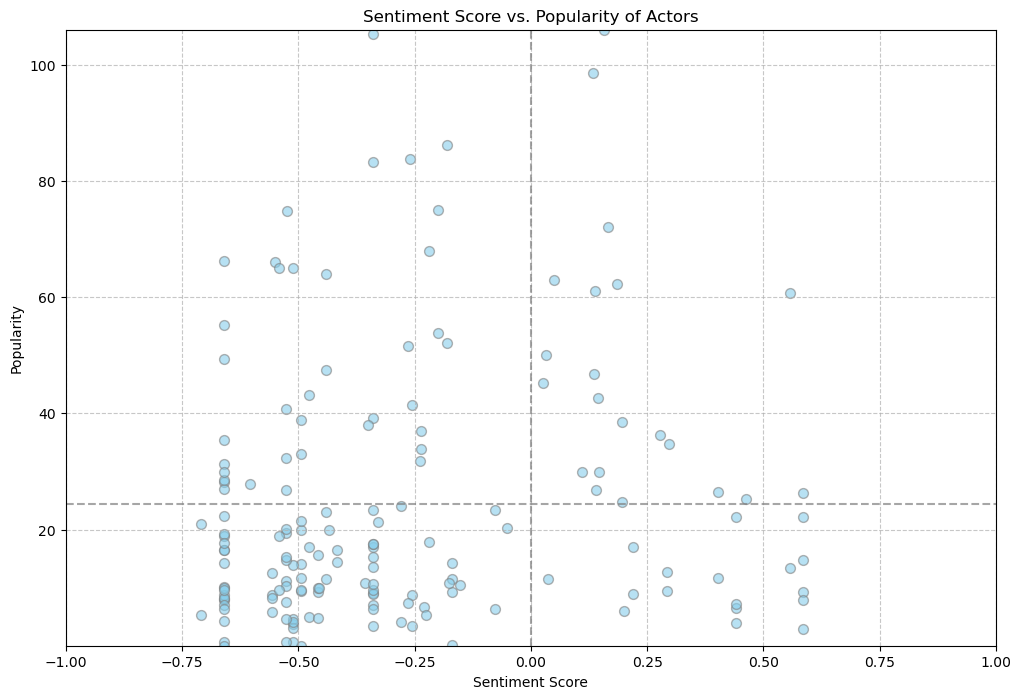

In [6]:
# Load the data and plot the sentiment and popularity scores
df = pd.read_csv(PATH)
plot_sentiment_and_popularity(df)

This plot showcases the density of actors depending on the received sentiment scores of the characters they played and their popularity. The sentiment score was computed based on sentiment analysis on the tvtropes file.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
ABS_PATH='/Users/mehdibouchoucha/Desktop/ADA/ada-2024-project-theundocumentedanalysts/data'

## Data Manipulation

In [5]:
character_metadata = pd.read_csv(ABS_PATH+'/CMU_dataset/character.metadata.tsv', sep='\t', names=[
    'movie_id', 'freebase_id', 'release_date', 'character_name', 'actor_dob', 'actor_gender', 
    'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age', 'character_actor_map_id', 
    'character_freebase_id', 'actor_freebase_id'
])
plot_summaries = pd.read_csv(ABS_PATH+'/CMU_dataset/plot_summaries.txt', sep='\t', names=['movie_id', 'plot_summary'])

For this analysis, the only relevant columns are 'movie_id' and 'character_name', as they allow us to effectively study the characters in relation to the plot summaries of their respective movies.

In [6]:
# Keep only relevant columns
character_data = character_metadata.loc[:, ['movie_id', 'character_name']]
character_data.head()

,movie_id,character_name
0,975900,Akooshay
1,975900,Lieutenant Melanie Ballard
2,975900,Desolation Williams
3,975900,Sgt Jericho Butler
4,975900,Bashira Kincaid


In [7]:
# Merge plot summaries and character data on movie_id
merged_data = pd.merge(plot_summaries, character_data, on='movie_id')
merged_data

,movie_id,plot_summary,character_name
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",NaN
1,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",NaN
2,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",NaN
3,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",NaN
4,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",NaN
...,...,...,...
308480,6040782,1940 - Operation Dynamo has just taken place. ...,NaN
308481,6040782,1940 - Operation Dynamo has just taken place. ...,NaN
308482,6040782,1940 - Operation Dynamo has just taken place. ...,NaN
308483,6040782,1940 - Operation Dynamo has just taken place. ...,NaN


In [8]:
# Drop NaN values
merged_data_clean = merged_data.dropna(subset=['character_name']).reset_index(drop=True)
merged_data_clean

,movie_id,plot_summary,character_name
0,31186339,The nation of Panem consists of a wealthy Capi...,Foxface
1,31186339,The nation of Panem consists of a wealthy Capi...,Katniss Everdeen
2,31186339,The nation of Panem consists of a wealthy Capi...,Peeta Mellark
3,31186339,The nation of Panem consists of a wealthy Capi...,Effie Trinket
4,31186339,The nation of Panem consists of a wealthy Capi...,Gale Hawthorne
...,...,...,...
142411,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Amina A. Khan
142412,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Neelam Bai
142413,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Raj Varma
142414,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Manoj Mukherjee


Since some characters are not mentioned in the plot summaries, here, we will exclude them from our data, as no meaningful analysis can be conducted on them.

In [9]:
# Keep characters that are mentioned in the plot summary
characters_in_plot = merged_data_clean.copy()
# Define a lambda function to check if any part of the character name is in the plot summary
characters_in_plot = characters_in_plot[characters_in_plot.apply(
    lambda row: any(part.lower() in row['plot_summary'].lower() for part in row['character_name'].split()),
    axis=1
)].reset_index(drop=True)


characters_in_plot

,movie_id,plot_summary,character_name
0,31186339,The nation of Panem consists of a wealthy Capi...,Foxface
1,31186339,The nation of Panem consists of a wealthy Capi...,Katniss Everdeen
2,31186339,The nation of Panem consists of a wealthy Capi...,Peeta Mellark
3,31186339,The nation of Panem consists of a wealthy Capi...,Haymitch Abernathy
4,31186339,The nation of Panem consists of a wealthy Capi...,Clove
...,...,...,...
80948,17208834,A high school prom in Georgia is unexpectedly ...,Steven
80949,17208834,A high school prom in Georgia is unexpectedly ...,Kyle Grubbin
80950,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Abdul Rehman Khan
80951,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Mini


Here, we extract a unique context for each character by identifying where they are specifically mentioned within the plot summary. This can be used for further analysis.

In [10]:
# Apply the function to create a character-specific context
characters_in_plot['character_context'] = characters_in_plot.apply(extract_character_context, axis=1)

# View the updated DataFrame to check character-specific contexts
characters_in_plot[['character_name', 'character_context']]

,character_name,character_context
0,Foxface,"Foxface, the girl from District 5, dies from e..."
1,Katniss Everdeen,"In her first Reaping, 12-year-old Primrose Eve..."
2,Peeta Mellark,"Peeta Mellark, a baker's son who once gave Kat..."
3,Haymitch Abernathy,"Katniss and Peeta are taken to the Capitol, ac..."
4,Clove,Clove ambushes her and pins her down. As Clove...
...,...,...
80948,Steven,"As zombies march on the high school, a motley ..."
80949,Kyle Grubbin,"As zombies march on the high school, a motley ..."
80950,Abdul Rehman Khan,"Abdur Rehman Khan , a middle-aged dry fruit se..."
80951,Mini,"Abdur Rehman Khan , a middle-aged dry fruit se..."


## Vader Sentiment Analysis

We begin by conducting a VADER sentiment analysis on our characters to gain an initial understanding of the overall sentiment surrounding each one. Each character will be assigned a 'sentiment score' based on the analysis of their plot summaries. This score, known as the 'compound score,' provides a measure of overall sentiment, ranging from -1 (most negative) to +1 (most positive).

In [11]:
vader_data = characters_in_plot.copy()

# Apply the function to each row of the DataFrame
vader_data['character_sentiment_score'] = vader_data.apply(character_sentiment_extraction, axis=1)

In [12]:
#drop Nans
vader_data.dropna()
vader_data[['character_name', 'character_sentiment_score']]

,character_name,character_sentiment_score
0,Foxface,-0.611500
1,Katniss Everdeen,-0.242828
2,Peeta Mellark,-0.197344
3,Haymitch Abernathy,-0.488550
4,Clove,-0.418000
...,...,...
80948,Steven,0.011117
80949,Kyle Grubbin,-0.291233
80950,Abdul Rehman Khan,0.100629
80951,Mini,0.086400


### Classifying characters

We will start with a simple classification of our characters to identify the 'villain' archetypes. By selecting a threshold for the sentiment scores, we classify each character as either a villain or not based on their sentiment.

In [13]:
# Apply the function to each row in the DataFrame
vader_data['villain_classification'] = vader_data.apply(classify_villain_via_sentiment, axis=1)

# View the updated DataFrame
vader_data[['character_name', 'villain_classification']]


,character_name,villain_classification
0,Foxface,Villain
1,Katniss Everdeen,Not Villain
2,Peeta Mellark,Not Villain
3,Haymitch Abernathy,Villain
4,Clove,Villain
...,...,...
80948,Steven,Not Villain
80949,Kyle Grubbin,Not Villain
80950,Abdul Rehman Khan,Not Villain
80951,Mini,Not Villain


### What's a Sympathetic Villain?

This is an initial approach to identifying sympathetic villains. Here, we aim to find common ground between the villain archetype and traits that make them more relatable, engaging, or sympathetic. We attempt to identify contextual elements, such as trauma, loss, or being misunderstood, which could contribute to portraying the villain in a more sympathetic light.

In [14]:
# Filtering for potential sympathetic villains
sympathetic_villains = vader_data[
    (vader_data['villain_classification'] == "Villain") &
    (vader_data['plot_summary'].str.contains('sympathy|tragedy|struggle|misunderstood|loss|trauma', case=False)) #can change condition
]

In [47]:
print("Potential Sympathetic Villains:")
sympathetic_villains.loc[:, ['character_name', 'character_sentiment_score']]

Potential Sympathetic Villains:


,character_name,character_sentiment_score
99,Kendall,-0.475650
100,Lt. Bracken,-0.711350
102,Mary Riggs,-0.711350
103,Mary,-0.711350
207,Judge Marshall Stevens,-0.685300
...,...,...
80616,Jack Crawford,-0.327567
80617,Reba McClane,-0.456200
80618,Molly Graham,-0.458520
80619,Freddy Lounds,-0.461500


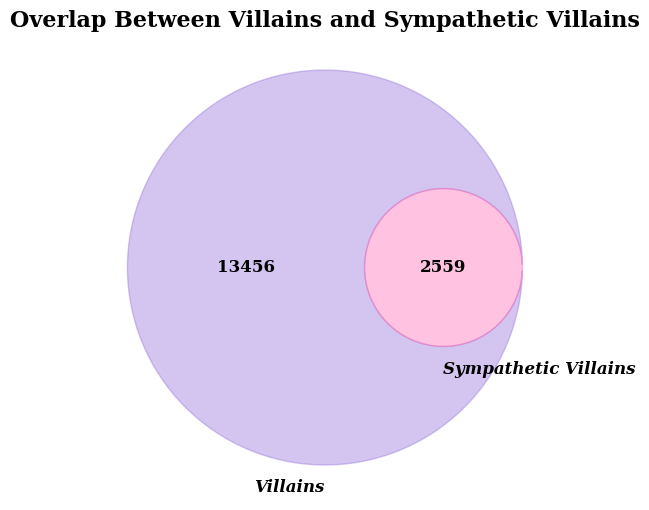

In [48]:
from matplotlib_venn import venn2
from matplotlib import font_manager

# Number of villains
num_villains = len(vader_data[vader_data['villain_classification'] == 'Villain'])

# Number of sympathetic villains (all of which are villains)
num_sympathetic_villains = len(sympathetic_villains)

# Create a Venn diagram
plt.figure(figsize=(6, 8))
venn = venn2(subsets=(
    num_villains - num_sympathetic_villains,  # Only villains
    0,  # Only sympathetic villains (none in this case)
    num_sympathetic_villains  # Villains that are also sympathetic
), set_labels=('Villains', 'Sympathetic Villains'))

# Set colors for each subset
venn.get_patch_by_id('10').set_color('#9370DB')  # Only villains (purple)
venn.get_patch_by_id('11').set_color('#FF69B4')  # Villains that are also sympathetic (pink)

# Remove the text label for empty subset
if venn.get_label_by_id('01') is not None:
    venn.get_label_by_id('01').set_text('')

# Set font properties for the labels
font_properties = font_manager.FontProperties(family='serif', style='italic', weight='bold', size=12)

# Update the set labels ("Villains", "Sympathetic Villains")
venn.get_label_by_id('A').set_fontproperties(font_properties)
venn.get_label_by_id('B').set_fontproperties(font_properties)

# Update subset label fonts (numbers within the diagram)
for subset_id in ('10', '11'):
    if venn.get_label_by_id(subset_id) is not None:
        venn.get_label_by_id(subset_id).set_fontsize(12)
        venn.get_label_by_id(subset_id).set_fontweight('bold')
        venn.get_label_by_id(subset_id).set_family('serif')

# Set title for the plot with custom font
plt.title('Overlap Between Villains and Sympathetic Villains', fontsize=16, fontweight='bold', family='serif')

# Display the plot
plt.show()


## Conclusion:
This work represents an initial step towards identifying sympathetic villains through sentiment analysis. Our preliminary findings already reveal that some villains possess contextual backgrounds—such as personal loss, being misunderstood, or morally complex decisions—that make them more relatable and emotionally compelling to audiences. These early observations indicate that sympathy for a villain often stems from narratives that blur the lines between good and evil, showing the humanity behind their actions.

However, to gain a truly comprehensive understanding of what makes a villain sympathetic, more in-depth analysis is needed. Future work could leverage advanced NLP models  to capture subtler emotional cues that sentiment scores may overlook.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Predictor first prototype

### Introduction

This Jupyter Notebook is dedicated to building a predictive model for movie success. By combining data on movie metadata, character details, and enriched information from TMDb, our goal is to create a robust predictor that can estimate a movie's success based on various factors like genre, actor collaborations, and character traits. This analysis will lay the groundwork for understanding what makes a movie successful, helping to uncover the key elements that contribute to box office performance and critical acclaim. Through data merging, cleaning, and advanced modeling, this Notebook aims to provide valuable insights into the factors driving cinematic success.


This cell imports the necessary libraries and modules that are used throughout the Notebook for data processing, visualization, and machine learning tasks. The key libraries include:

- **pandas and numpy**: Used for data manipulation and numerical operations.
- **matplotlib and seaborn**: Used for creating plots and visualizations.
- **xgboost**: Provides powerful gradient boosting algorithms for building predictive models.
- **sklearn**: Includes tools for data preprocessing, model evaluation, and splitting datasets into training and testing sets.
- **scipy.stats**: Used for statistical operations, such as generating distributions for hyperparameter tuning.

This extensive list of imports suggests a comprehensive data science workflow that covers data handling, model building, and visualization.

In [49]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
import re
from sklearn.preprocessing import MultiLabelBinarizer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import uniform, randint
import seaborn as sns
import scipy.stats as stats

In [50]:
import os
print(os.getcwd())
ABS_PATH = '/Users/mehdibouchoucha/Desktop/ADA/ada-2024-project-theundocumentedanalysts/data'

/Users/mehdibouchoucha/Desktop/ADA/ada-2024-project-theundocumentedanalysts/src/scripts


### Loading Movie and Character Metadata

This cell loads two datasets containing movie metadata and character information using Pandas. The `movie_metadata` dataset provides details about movies such as their IDs, names, release dates, box office revenue, runtime, languages, countries, and genres. The `character_metadata` dataset focuses on character-level details, including names, associated movies, actors' personal information, and unique identifiers.

In [51]:
movie_metadata = pd.read_csv(ABS_PATH+'/CMU_dataset/movie.metadata.tsv', sep='\t', header=None, 
                names=['wikipedia_movie_id', 
                        'freebase_movie_id', 
                        'movie_name', 
                        'movie_release_date', 
                        'movie_box_office_revenue', 
                        'movie_runtime', 
                        'movie_languages', 
                        'movie_countries', 
                        'movie_genres'])


character_metadata = pd.read_csv(ABS_PATH+'/CMU_dataset/character.metadata.tsv', sep='\t', 
                                header=None, 
                                names=['wikipedia_movie_id',
                                'freebase_movie_id',
                                'movie_release_date',
                                'character_name',
                                'actor_date_of_birth',
                                'actor_gender',
                                'actor_height',
                                'actor_ethnicity',
                                'actor_name',
                                'actor_age_at_movie_release',
                                'freebase_character_actor_map_id',
                                'freebase_character_id',
                                'freebase_actor_id'])

### Merging Character and Movie Metadata

This cell merges the `character_metadata` and `movie_metadata` DataFrames on the common column `wikipedia_movie_id` using an inner join. This operation creates a new dataset, `merged_movie_character`, which combines information about both movies and their associated characters. The inner join ensures that only rows with matching `wikipedia_movie_id` values in both DataFrames are retained.

In [52]:
merged_movie_character = pd.merge(character_metadata, movie_metadata, 
                                  left_on='wikipedia_movie_id', 
                                  right_on='wikipedia_movie_id', 
                                  how='inner')

### Dropping Unnecessary Columns

In this cell, several columns are dropped from the `merged_movie_character` DataFrame, including `freebase_character_actor_map_id`, `freebase_character_id`, `freebase_actor_id`, `freebase_movie_id_x`, and `freebase_movie_id_y`. These columns contain identifiers that are not relevant for further analysis. 

In [53]:

#remove the columns freebase_character_actor_map_id freebase_character_id freebase_actor_id  freebase_movie_id_y

merged_movie_character = merged_movie_character.drop(['freebase_character_actor_map_id',
                                                                'freebase_character_id',
                                                                'freebase_actor_id',
                                                                'freebase_movie_id_x',
                                                                'freebase_movie_id_y'], axis=1)


### Loading and Cleaning TMDb Dataset

This cell loads data from a TMDb dataset stored in an Excel file. After loading the data, it applies several preprocessing steps:

1. **Filtering**: The dataset is filtered to retain only movies with a release date on or before `2014-03-28`.

2. **Column Removal**: Various columns such as `ID`, `FILMID`, `BACKDROP_PATH`, `HOMEPAGE`, `IMDB_ID`, `POSTER_PATH`, `ORIGINAL_LANGUAGE`, `ORIGINAL_TITLE`, `OVERVIEW`, `STATUS_`, and `COLLECTIONID` are removed. This step reduces unnecessary data, focusing on relevant attributes.

3. **Merging with Character Data**: The cleaned TMDb dataset is then merged with the `merged_movie_character` DataFrame on the `movie_name` (from `merged_movie_character`) and `TITLE` (from the TMDb dataset) columns using an inner join. This creates a new dataset, `merged_movie_character_tmdb`, which combines movie-specific data from TMDb with previously merged character and movie metadata.


In [54]:
#load tmdb dataset (xlsx file)
tmdb = pd.read_excel(ABS_PATH+'/TMDB_dataset/MOVIE.xlsx')

#remove values where release date is after 2014-03-28
tmdb = tmdb[tmdb['RELEASE_DATE'] <= '2014-03-28']
#remove column ID, FILMID, BACKDROP_PATH, HOMEPAGE, IMDB_ID, ORIGINAL_LANGUAGE, ORIGINAL_TITLE, OVERVIEW,STATUS ,COLLECTIONID,POSTER_PATH
tmdb = tmdb.drop(['ID', 'FILMID', 'BACKDROP_PATH', 'HOMEPAGE', 'IMDB_ID','POSTER_PATH', 'ORIGINAL_LANGUAGE', 'ORIGINAL_TITLE', 'OVERVIEW', 'STATUS_', 'COLLECTIONID'], axis=1)
#join the tmdb dataset with the merged_movie_character_plot dataset on the movie_name column
merged_movie_character_tmdb = pd.merge(merged_movie_character, tmdb, 
                                            left_on='movie_name', 
                                            right_on='TITLE', 
                                            how='inner')


### Handling Missing Budget and Dropping Irrelevant Columns

This cell performs several data cleaning tasks on the `merged_movie_character_tmdb` DataFrame:


1. **Dropping Irrelevant Columns**: It removes the `actor_date_of_birth`, `REVENUE` (since `movie_box_office_revenue` is already present), `TAGLINE`, and `TITLE` columns to streamline the dataset by retaining only necessary features.

2. **Handling Missing Values in Budget**: Rows with missing values and 0s in the `BUDGET` column are dropped to ensure all entries have valid budget data.



In [55]:

#remove actor_date_of_birth, revenue column (since we already have box office revenue),tagline and title
merged_movie_character_tmdb = merged_movie_character_tmdb.drop(['actor_date_of_birth','REVENUE','TAGLINE','TITLE'], axis=1)
#remove values where budget is NaN or 0
merged_movie_character_tmdb = merged_movie_character_tmdb[merged_movie_character_tmdb['BUDGET'] > 0]



### Dropping Columns with High Missing Values

This cell removes columns with more than 40% missing values from the `merged_movie_character_tmdb` DataFrame, ensuring that only features with sufficient data are retained for analysis. This step reduces noise and improves data quality.

In [56]:
#remove column with more than 40% missing values
merged_movie_character_tmdb = merged_movie_character_tmdb.dropna(thresh=0.6*len(merged_movie_character_tmdb), axis=1)


### Filling Missing Numeric Values

This cell fills missing values in numeric columns with their median values, ensuring data consistency and robustness against outliers.

In [57]:
#fill missing values in each column with numerical values with the median value of that column
for column in merged_movie_character_tmdb.select_dtypes(include=['float64', 'int64']).columns:
    merged_movie_character_tmdb[column].fillna(merged_movie_character_tmdb[column].median(), inplace=True)


/var/folders/kk/gkc7tsxj1ml1y68bbcxbj6440000gn/T/ipykernel_52347/2781533621.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_movie_character_tmdb[column].fillna(merged_movie_character_tmdb[column].median(), inplace=True)


### One-Hot Encoding for Actors with Frequent Appearances

This cell counts the number of distinct movies each actor appears in and creates one-hot encoded dummy variables for actors who appear in at least five different movies. This transformation enables the model to capture the influence of frequently appearing actors in the dataset, enhancing feature richness.

In [58]:
# Count the appearances of each actor in distinct movies
actor_movie_counts = merged_movie_character_tmdb.groupby('actor_name')['movie_name'].nunique()

# Filter actors who appear at least 5 times in different movies
actors_with_5_or_more_movies = actor_movie_counts[actor_movie_counts >= 5].index

# Create a DataFrame for the dummy variables
# Initialize an empty dictionary to store the new columns
dummy_actor_columns = {}

# Iterate over the actors and create the dummy columns
for actor in actors_with_5_or_more_movies:
    dummy_column = (merged_movie_character_tmdb['actor_name'] == actor).astype(int)
    dummy_actor_columns[f'dummy_actor_{actor}'] = dummy_column

# Convert the dictionary to a DataFrame
dummy_actor_df = pd.DataFrame(dummy_actor_columns)

# Reset indices to ensure alignment
merged_movie_character_tmdb.reset_index(drop=True, inplace=True)
dummy_actor_df.reset_index(drop=True, inplace=True)

# Concatenate the dummy columns to the original DataFrame
merged_movie_character_tmdb = pd.concat([merged_movie_character_tmdb, dummy_actor_df], axis=1)


### Cleaning and One-Hot Encoding Categorical Columns

This cell performs several tasks:

1. **Genre Extraction and Encoding**: Cleans and extracts genre names from the `movie_genres` column, then uses one-hot encoding to create binary features for each genre.
2. **Language and Country Encoding**: Cleans and extracts languages and countries from the respective columns and applies one-hot encoding to these features as well.
3. **Column Removal**: Drops original columns like `movie_genres`, `genre_list`, `movie_languages`, `movie_countries`, `actor_name`, and `character_name` to avoid redundancy.

This step converts categorical data into a numeric format suitable for modeling while enriching the dataset with meaningful features.

In [ ]:
# Function to clean certain columns
def clean_column(genre_str):
    if pd.isna(genre_str):
        return []
    else:
        # Use regex to find all genre names in the string
        pattern = r':\s*["\']([^"\']+)["\']'
        genres = re.findall(pattern, genre_str)
        return genres

# Apply the function to create a new column with a list of genres
merged_movie_character_tmdb['genre_list'] = merged_movie_character_tmdb['movie_genres'].apply(clean_column)

# Use MultiLabelBinarizer to perform one-hot encoding on the 'genre_list' column
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(merged_movie_character_tmdb['genre_list']),
                            columns=mlb.classes_,
                            index=merged_movie_character_tmdb.index)

# Concatenate the dummy variables to the original dataframe
merged_movie_character_tmdb = pd.concat([merged_movie_character_tmdb, genre_dummies], axis=1)

merged_movie_character_tmdb['movie_languages'] = merged_movie_character_tmdb['movie_languages'].apply(clean_column)

movie_languages_dummies = pd.DataFrame(mlb.fit_transform(merged_movie_character_tmdb['movie_languages']),
                                columns=mlb.classes_,
                                index=merged_movie_character_tmdb.index)
merged_movie_character_tmdb = pd.concat([merged_movie_character_tmdb, movie_languages_dummies], axis=1)

merged_movie_character_tmdb['movie_countries'] = merged_movie_character_tmdb['movie_countries'].apply(clean_column)

movie_countries_dummies = pd.DataFrame(mlb.fit_transform(merged_movie_character_tmdb['movie_countries']),
                                columns=mlb.classes_,
                                index=merged_movie_character_tmdb.index)
merged_movie_character_tmdb = pd.concat([merged_movie_character_tmdb, movie_countries_dummies], axis=1)


merged_movie_character_tmdb = merged_movie_character_tmdb.drop(['movie_genres', 'genre_list', 'movie_languages', 'movie_countries','actor_name','character_name'], axis=1)


### Converting Release Date and Dropping Redundant Column

This cell converts the `movie_release_date_x` column to a datetime format and extracts the year from it. It then drops the `movie_release_date_y` column, which may be redundant after merging. This step ensures consistent date formatting and focuses on extracting relevant date-related information for further analysis.

In [60]:
# Convert the release date to datetime, coercing errors to NaT
merged_movie_character_tmdb['movie_release_date_x'] = pd.to_datetime(
    merged_movie_character_tmdb['movie_release_date_x'], errors='coerce'
)

# Extract the year from the release date
merged_movie_character_tmdb['movie_release_date_x'] = merged_movie_character_tmdb['movie_release_date_x'].dt.year

#drop column movie_release_date_y
merged_movie_character_tmdb = merged_movie_character_tmdb.drop(['movie_release_date_y'], axis=1)


### Removing Rows with Missing Values and Filtering by Vote Count

This cell performs two key data cleaning operations:

1. **Removing Rows with Missing Values**: Drops rows that contain any missing values to ensure data completeness.
2. **Filtering by Vote Count**: Retains only rows where `VOTE_COUNT` is greater than or equal to 5, focusing the analysis on movies with a minimum level of engagement.



In [61]:
#remove values that have nans
merged_movie_character_tmdb = merged_movie_character_tmdb.dropna()
#remove values that have a vote count less than 5
merged_movie_character_tmdb = merged_movie_character_tmdb[merged_movie_character_tmdb['VOTE_COUNT'] >= 5]


### Dropping Specific Columns and Duplicates

This cell removes the `actor_gender`, `wikipedia_movie_id`, and `actor_age_at_movie_release` columns from the `merged_movie_character_tmdb` DataFrame. It also ensures that only one entry per `movie_name` is retained by dropping duplicate entries based on this column. 

In [62]:
# Remove columns actor_gender, wikipedia_movie_id
merged_movie_character_tmdb = merged_movie_character_tmdb.drop(columns=['actor_gender', 'wikipedia_movie_id','actor_age_at_movie_release'])
# only keep one value per  'movie_name'
merged_movie_character_tmdb = merged_movie_character_tmdb.drop_duplicates(subset=['movie_name'])


In [63]:
#remove column RELEASE_DATE and movie_name
merged_movie_character_tmdb = merged_movie_character_tmdb.drop(['RELEASE_DATE','movie_name'], axis=1)


### Converting `ADULT` Column to Binary

This cell transforms the `ADULT` column in the `merged_movie_character_tmdb` DataFrame into a binary format. It converts values to `1` if the movie is marked as adult (`True`) and `0` otherwise. 

In [64]:
#make ADULT column binary instead true and false
merged_movie_character_tmdb['ADULT'] = merged_movie_character_tmdb['ADULT'].apply(lambda x: 1 if x == True else 0)


### Removing Columns with Zero Variance

This cell removes columns from the `merged_movie_character_tmdb` DataFrame that have zero variance. Columns with zero variance contain the same value for all observations and therefore do not contribute any useful information for modeling or analysis. 

In [65]:
#removie columns with 0 variance
merged_movie_character_tmdb = merged_movie_character_tmdb.loc[:, merged_movie_character_tmdb.var() != 0]


### Data Preprocessing, Outlier Removal, Feature Scaling, and Model Training

This cell performs an end-to-end pipeline, including data preprocessing, outlier removal, feature scaling, and model training:

1. **Initial Data Copy**: A copy of the `merged_movie_character_tmdb` DataFrame is made to preserve the original data.

2. **Non-Scalar Value Handling**: Columns containing non-scalar values are identified and removed to ensure data compatibility for modeling.

3. **Numeric Data Selection and Missing Value Handling**: Only numeric columns are retained, and missing values are filled with their column mean.

4. **Outlier Removal**: Outliers in the `VOTE_AVERAGE` column are removed using the IQR method with a threshold of 1.5, focusing the data on central values.

5. **Feature and Target Separation**: The features (`X`) and target (`y`) are separated, with further cleaning to ensure no missing values in `y`.

6. **Feature Scaling**: Features are standardized using `StandardScaler` to ensure consistent input for modeling.

7. **Train-Test Split**: The data is split into training and testing sets to facilitate model evaluation.

8. **Model Training with XGBoost**: An `XGBRegressor` is set up with hyperparameter tuning using `RandomizedSearchCV` and 5-fold cross-validation to optimize performance.

9. **Model Evaluation**: The best model is evaluated on the test set using mean absolute error (MAE) and mean absolute percentage error (MAPE).

10. **Cross-Validation**: Additional 5-fold cross-validation on the best model is conducted to assess its robustness and performance consistency across folds.



In [66]:
# Copy the DataFrame to avoid modifying the original data
df = merged_movie_character_tmdb.copy()

scaler = StandardScaler()

# Identify columns with non-scalar values
non_scalar_columns = []
for col in df.columns:
    first_elem = df[col].iloc[0]
    if not np.isscalar(first_elem):
        print(f"Column '{col}' contains non-scalar values of type {type(first_elem)}")
        non_scalar_columns.append(col)

# Handle non-scalar columns
if non_scalar_columns:
    df.drop(non_scalar_columns, axis=1, inplace=True)
    print(f"Dropped columns: {non_scalar_columns}")

# Ensure all features are numeric
df = df.select_dtypes(include=[np.number])

# Handle missing values
df.fillna(df.mean(), inplace=True)


#Remove outliers in using the IQR method

Q1 = df['VOTE_AVERAGE'].quantile(0.25)
Q3 = df['VOTE_AVERAGE'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
df = df[(df['VOTE_AVERAGE'] >= lower_bound) & (df['VOTE_AVERAGE'] <= upper_bound)]

# Separate features and target variable
X = df.drop(['VOTE_AVERAGE'], axis=1)
y = df['VOTE_AVERAGE']


# Drop rows where the target variable is missing
X = X[y.notnull()]
y = y[y.notnull()]

X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)





# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Proceed with setting up the XGBRegressor as before
# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

# Initialize the XGBRegressor
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist',  # Use 'hist' for faster computation
    n_jobs=-1
)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Train the model
random_search.fit(X_train, y_train)

# Get the best estimator
best_xgb = random_search.best_estimator_

# 6. Model Evaluation

# Evaluate the model on the test set
y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on test data: {mae:.4f}")
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error on test data: {mape:.4f}")

# Print best hyperparameters
print("\nBest hyperparameters found:")
for param_name in sorted(random_search.best_params_.keys()):
    print(f"{param_name}: {random_search.best_params_[param_name]}")

# 7. 5-Fold Cross-Validation on the Best Model

# Set up cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(
    best_xgb,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1,
)

# Calculate mean MAE
mean_cv_mae = -np.mean(cv_scores)
std_cv_mae = np.std(cv_scores)

print(f"\nMean CV MAE: {mean_cv_mae:.4f} ± {std_cv_mae:.4f}")
print("Cross-validation MAE scores for each fold:", -cv_scores)


Column 'Silent film' contains non-scalar values of type <class 'pandas.core.series.Series'>
Column 'France' contains non-scalar values of type <class 'pandas.core.series.Series'>
Column 'Silent film' contains non-scalar values of type <class 'pandas.core.series.Series'>
Column 'France' contains non-scalar values of type <class 'pandas.core.series.Series'>
Dropped columns: ['Silent film', 'France', 'Silent film', 'France']
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mean Absolute Error on test data: 0.4147
Mean Absolute Percentage Error on test data: 0.0694

Best hyperparameters found:
colsample_bytree: 0.7173952698872152
gamma: 0.007039911357542228
learning_rate: 0.049768480817761036
max_depth: 5
n_estimators: 518
reg_alpha: 0.7712703466859457
reg_lambda: 0.07404465173409036
subsample: 0.7433862914177091


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.6s remaining:    9.9s



Mean CV MAE: 0.4175 ± 0.0131
Cross-validation MAE scores for each fold: [0.42647072 0.40616848 0.4292777  0.39755238 0.42779905]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


### Model Performance Summary and Interpretation

#### Model Evaluation Metrics:
- **Mean Absolute Error (MAE) on Test Data**: 0.4147  
  This indicates that, on average, the model's predictions differ from the actual values of `VOTE_AVERAGE` by approximately 0.4147. While this error is not extremely high, there is room for further optimization to improve predictive accuracy.
  
- **Mean Absolute Percentage Error (MAPE) on Test Data**: 0.0694 (or 6.94%)  
  This shows that, on average, the model's predictions are off by about 6.94% relative to the actual values. A lower MAPE suggests that the model generally provides accurate predictions relative to the scale of the target variable.

#### Hyperparameter Tuning Results:
- **Optimal Hyperparameters**:
  - `colsample_bytree`: 0.7174  
    This parameter controls the fraction of features (columns) that are randomly sampled for each tree, helping to reduce overfitting.
  - `gamma`: 0.0070  
    This value for `gamma` indicates minimal regularization based on node split loss reduction, slightly penalizing overly complex trees.
  - `learning_rate`: 0.0498  
    A relatively small learning rate slows down the model training, leading to more robust learning but requiring a higher number of trees.
  - `max_depth`: 5  
    The maximum depth of the trees is set to 5, balancing complexity and generalization by preventing overly deep trees that could lead to overfitting.
  - `n_estimators`: 518  
    This specifies the number of boosting rounds (trees) in the model.
  - `reg_alpha`: 0.7713 and `reg_lambda`: 0.0740  
    These are regularization terms for L1 (alpha) and L2 (lambda) regularization, respectively, controlling model complexity and preventing overfitting.
  - `subsample`: 0.7434  
    This parameter controls the fraction of samples used for training each tree, further helping to generalize the model.

#### Cross-Validation Results:
- **Mean CV MAE**: 0.4175 ± 0.0131  
  The mean cross-validated MAE, along with its standard deviation, suggests that the model's performance is relatively consistent across different folds. The small standard deviation (0.0131) indicates a stable model performance during cross-validation.
- **Cross-Validation MAE Scores**: [0.4265, 0.4062, 0.4293, 0.3976, 0.4278]  
  These values reflect the MAE achieved in each fold during cross-validation. While there is slight variation across the folds, the performance remains relatively consistent.

### Conclusion:
The model shows a reasonably low error rate, suggesting it performs well at predicting the target variable, `VOTE_AVERAGE`. The optimal hyperparameters found via random search contribute to the model's robustness and accuracy. There may be opportunities for further fine-tuning or feature engineering to reduce the error even more, but overall, the results indicate a solid predictive model with consistent performance across different subsets of data.

### Predicted vs Real Values Plot

This scatter plot compares actual values (`y_test`) to predicted values (`y_pred`). The red reference line `y = x` represents perfect predictions. Points closer to this line indicate better model accuracy, while deviations show prediction errors.

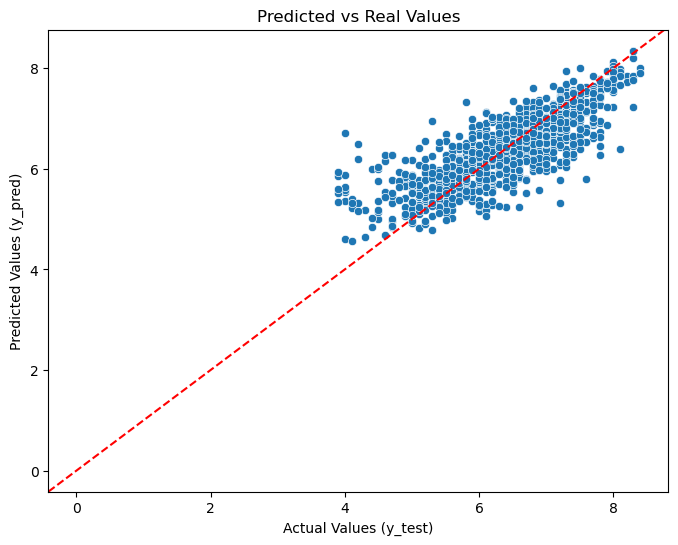

In [67]:

# Create a scatter plot for Predicted vs Real values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Predicted vs Real Values')
plt.axline((0, 0), slope=1, color='r', linestyle='--')  # Line y=x for reference
plt.show()


### Residual Plot

This plot shows the residuals (actual - predicted values) against predicted values. Random distribution around the red horizontal line at zero indicates good model performance

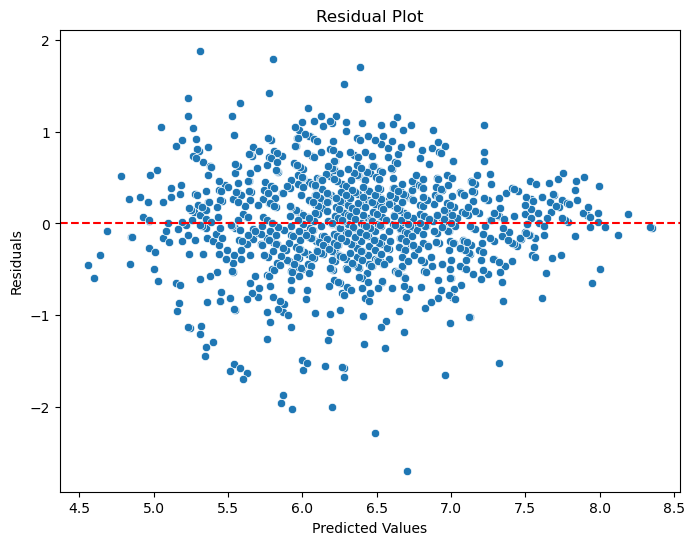

In [68]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


### Distribution of Residuals

This plot displays the distribution of residuals using a histogram with a kernel density estimate (KDE) overlay. The residuals appear to follow a roughly normal distribution, indicating that the model's errors are generally symmetric and centered around zero, which is a desirable trait in regression models.

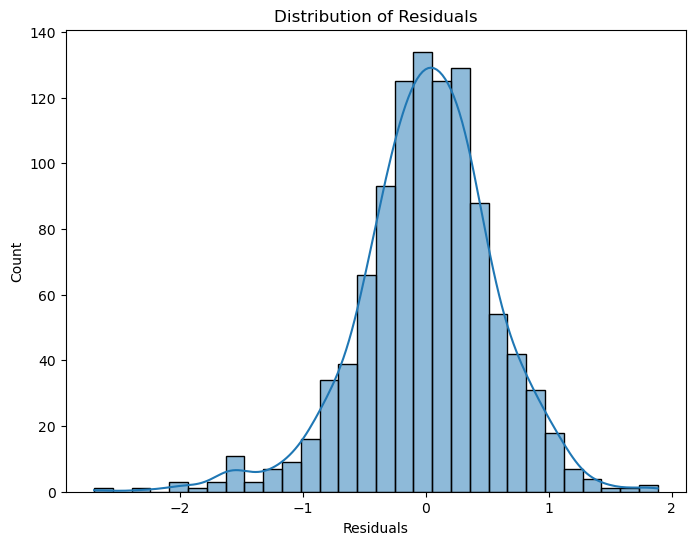

In [69]:
# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


### Normal Q-Q Plot for Residuals

This Q-Q plot compares the residuals to a theoretical normal distribution. The points lie approximately along the reference line, suggesting that the residuals are fairly close to normally distributed. Minor deviations may exist, but overall, the residuals display a reasonable level of normality, which supports model assumptions in regression analysis.

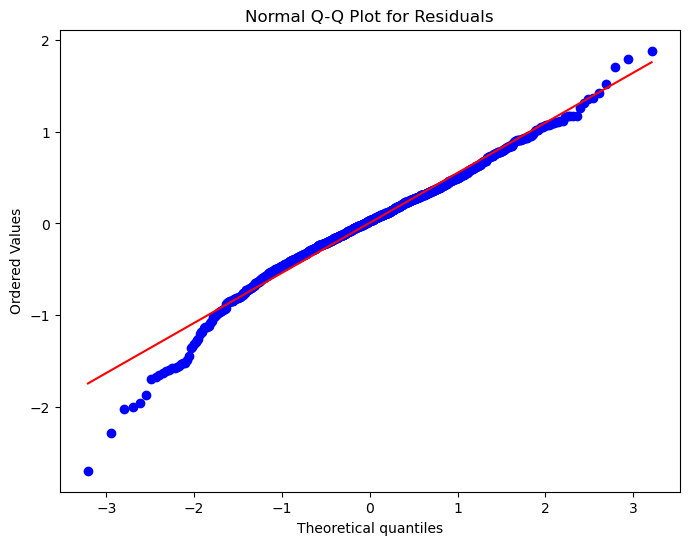

In [70]:

# Generate a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot for Residuals')
plt.show()

Our analysis demonstrates that leveraging data such as actors, countries, budget, and box office information can lead to promising predictive results regarding movie success. These features proved to be valuable predictors in building models that can estimate performance outcomes in the film industry. 

For future work, we aim to extend our approach by incorporating directors as an additional feature. We also plan to delve deeper into understanding what influences IMDb scores more significantly — the actors or the directors. Lastly, we will explore enhancing our predictive capabilities to better forecast box office revenue.
